<a href="https://colab.research.google.com/github/arkaslittlemind/Machine-Learning-ITA6016/blob/main/Convolutional_Neural_Network_29_07_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

Load cifar10 dataset into your jupyter notebook and find the shape of train samples. Total 50000 images ,image size 32*32 and RGB

In [2]:
(X_train,Y_train), (X_test,Y_test)= datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

CHECK THE TEST DATASET SIZE AND IMAGE SIZE

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

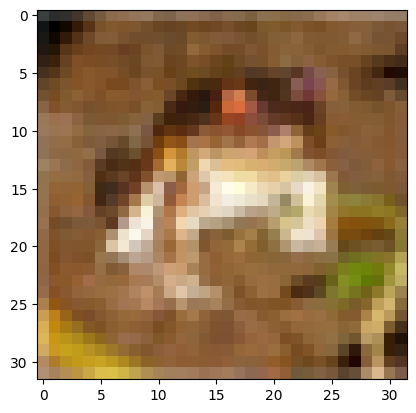

In [5]:
plt.imshow(X_train[0])

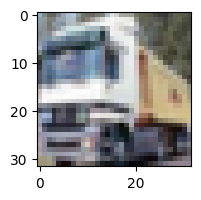

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])


In [7]:
X_train[0]



array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [9]:
X_train=X_train/255
X_test=X_test/255

Build ANN model

In [ ]:
ann = models.Sequential([
layers.Flatten(input_shape=(32,32,3)),
layers.Dense(3000,activation='relu'),
layers.Dense(1000,activation='relu'),
layers.Dense(10,activation='sigmoid')])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 154s 98ms/step - loss: 1.8102 - accuracy: 0.3538
Epoch 2/10
1563/1563 [==============================] - 160s 102ms/step - loss: 1.6209 - accuracy: 0.4321
Epoch 3/10
1049/1563 [===================>..........] - ETA: 49s - loss: 1.5512 - accuracy: 0.4547

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification_report",classification_report(Y_test,y_pred_classes))

CNN implementation

In [ ]:
cnn=models.Sequential([
layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),

layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
layers.MaxPooling2D((2,2)),

layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(10,activation='softmax')])



In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.4645 - accuracy: 0.4762
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1001 - accuracy: 0.6144
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9759 - accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8880 - accuracy: 0.6908
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8223 - accuracy: 0.7123
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7663 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7134 - accuracy: 0.7502
Epoch 8/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6710 - accuracy: 0.7645
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6322 - accuracy: 0.7785
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [ ]:
y_predd=cnn.predict(X_test)
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0080 - accuracy: 0.6769


[1.0079774856567383, 0.6769000291824341]

In [ ]:
print("classification_report",classification_report(Y_test,y_pred_classes))

classification_report               precision    recall  f1-score   support

           0       0.70      0.40      0.51      1000
           1       0.50      0.73      0.59      1000
           2       0.36      0.41      0.38      1000
           3       0.34      0.40      0.36      1000
           4       0.53      0.27      0.36      1000
           5       0.46      0.30      0.36      1000
           6       0.59      0.45      0.51      1000
           7       0.39      0.73      0.50      1000
           8       0.69      0.50      0.58      1000
           9       0.50      0.56      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000

